In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import sys
sys.path.append("../")
from algorithm.KoopPseudoSpec import KoopPseudoSpec
# from algorithm.PhasePlot import PhasePlot

In [2]:
# Load data from above computation - file available from the dropbox link
data = scipy.io.loadmat('D:\Residual-Dynamic-Mode-Decomposition-main\Examples_gallery_1\ResDMD_datasets\pendulum_data.mat')
A = data['A']
del data


In [3]:
N1 =50
N2 = 100

Id1 = np.maximum(np.kron(np.abs(np.arange(-N1, N1+1)), np.ones(N2)), 1)
Id2 = np.kron(np.ones(2*N1+1), np.arange(1, N2+1))
N_trun = N2/5 # you can choose a N_trun distintc of 20
Id3 = Id1 * Id2
Id =np.array(np.where(Id3 < N_trun + 1)[0])

A = A[Id][:,Id]  # sort out indexing

In [4]:
# Compute pseudospectra
x_pts = np.arange(-1.5, 1.5, 0.05)
y_pts = x_pts
z_pts = np.kron(x_pts, np.ones(len(y_pts))) + 1j * np.kron(np.ones(len(x_pts)), y_pts)
z_pts = z_pts.flatten()
# Assuming KoopPseudoSpec is a function you have in Python
RES = KoopPseudoSpec(np.eye(len(A)), A, np.eye(len(A)), z_pts)
RES = RES[0].reshape(len(y_pts), len(x_pts))


In [5]:
# EDMD eigenvalues
E = np.linalg.eig(A)[0]

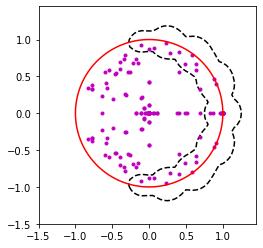

In [6]:
# Plotting pseudospectrum
z_pts1=z_pts.reshape(len(y_pts), len(x_pts))
plt.figure()
# Assuming you have the RES computed
plt.contour(z_pts1.real, z_pts1.imag,  np.log10(RES.real), levels=np.log10([1e-50, 0.25]), colors='k', linewidths=1.5)
plt.gca().set_aspect('equal', 'box')
plt.plot(E.real, E.imag, '.m')
plt.plot(np.exp(1j * np.linspace(0, 2*np.pi, 1000)).real, np.exp(1j * np.linspace(0, 2*np.pi, 1000)).imag, '-r')

# # Compute approximate eigenvalues and eigenfunctions
# E_test = [0.880347701848197 + 0.473226384533343j,
#           0.558620606228836 + 0.826563250517901j,
#           0.124674806328568 + 0.987209196182015j,
#           -0.314745042094750 + 0.936136228237800j]
# z = E_test[3]
# z = z / abs(z)

# xp1 = np.linspace(-np.pi, np.pi, 500)
# xp1 = xp1 + (xp1[1] - xp1[0]) / 2
# xp1 = xp1[:-1]
# xp2 = np.linspace(-4, 4, len(xp1))
# XpH = np.zeros((len(xp1), N2))
# XpH[:, 0] = np.exp(-0.5 * xp2**2) / np.pi**0.25
# XpH[:, 1] = XpH[:, 0] * np.sqrt(2) * xp2
# for j in range(2, N2):
#     XpH[:, j] = np.sqrt(2) / np.sqrt(j-1) * XpH[:, j-1] * xp2 - np.sqrt(j-2) / np.sqrt(j-1) * XpH[:, j-2]
# XpF = np.exp(1j * np.outer(np.arange(-N1, N1+1), xp1))

# H = np.eye(len(A)) - (z * A.T) - (z * A.T).conj() + abs(z)**2 * np.eye(len(A))
# V, D = np.linalg.eig(H)
# V2 = np.zeros(N2 * (2 * N1 + 1))
# V = V2.reshape(N2, 2*N1+1)
# PSI = (XpF.T @ V.T @ XpH.T).T

# # Assuming PhasePlot is a function you have in Python
# PhasePlot(xp1 + 1j * xp2, PSI, 'm')
# plt.gca().fontsize = 14
# plt.show()